In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression

from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

E:\Users\Chance\Anaconda3\envs\info7390\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\Users\Chance\Anaconda3\envs\info7390\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
weather = pd.read_csv("cycle-share-dataset/weather.csv")

In [4]:
weather.apply(lambda x: sum(x.isnull()),axis=0) 

Date                            0
Max_Temperature_F               0
Mean_Temperature_F              1
Min_TemperatureF                0
Max_Dew_Point_F                 0
MeanDew_Point_F                 0
Min_Dewpoint_F                  0
Max_Humidity                    0
Mean_Humidity                   0
Min_Humidity                    0
Max_Sea_Level_Pressure_In       0
Mean_Sea_Level_Pressure_In      0
Min_Sea_Level_Pressure_In       0
Max_Visibility_Miles            0
Mean_Visibility_Miles           0
Min_Visibility_Miles            0
Max_Wind_Speed_MPH              0
Mean_Wind_Speed_MPH             0
Max_Gust_Speed_MPH            185
Precipitation_In                0
Events                        361
dtype: int64

In [5]:
weather = weather[pd.notnull(weather['Mean_Temperature_F'])]
weather = weather[pd.notnull(weather['Max_Gust_Speed_MPH'])]

In [6]:
weather['Rain'] = weather['Precipitation_In'] > 0

In [7]:
weahter_P_SEA_DEW = weather[['Mean_Sea_Level_Pressure_In','MeanDew_Point_F', 'Rain']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E39A2E9E80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E39F665390>]], dtype=object)

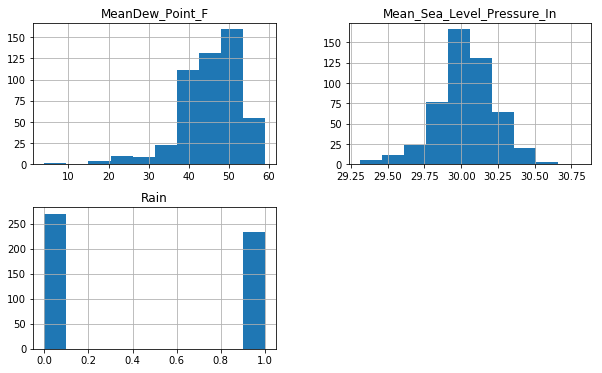

In [8]:
weahter_P_SEA_DEW.hist()

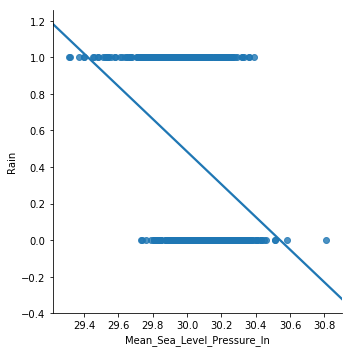

In [9]:
sns.lmplot(x='Mean_Sea_Level_Pressure_In', y='Rain', data=weahter_P_SEA_DEW, ci=None)

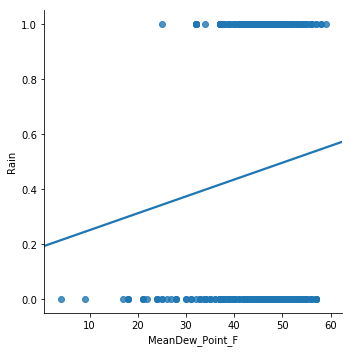

In [10]:
sns.lmplot(x='MeanDew_Point_F', y='Rain', data=weahter_P_SEA_DEW, ci=None)

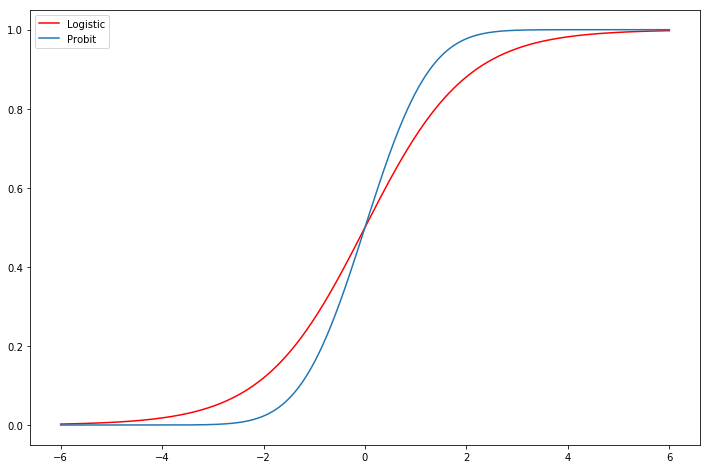

In [11]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.cdf(support), label='Probit')
ax.legend();

In [12]:
weahter_P_SEA_DEW['intercept'] = 1.0

In [13]:
weahter_P_SEA_DEW.head()

,Mean_Sea_Level_Pressure_In,MeanDew_Point_F,Rain,intercept
0,29.79,51,False,1.0
1,29.75,51,True,1.0
2,29.71,50,True,1.0
3,29.95,46,False,1.0
4,29.78,51,True,1.0


In [14]:
pred=['Mean_Sea_Level_Pressure_In','MeanDew_Point_F','intercept']
pred

['Mean_Sea_Level_Pressure_In', 'MeanDew_Point_F', 'intercept']

In [15]:
Rain_SEA_LV_model = sm.Logit(weahter_P_SEA_DEW['Rain'], weahter_P_SEA_DEW[pred]).fit()
Rain_SEA_LV_model.summary()

Optimization terminated successfully.
         Current function value: 0.617534
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Rain   No. Observations:                  504
Model:                          Logit   Df Residuals:                      501
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Nov 2017   Pseudo R-squ.:                  0.1058
Time:                        18:33:47   Log-Likelihood:                -311.24
converged:                       True   LL-Null:                       -348.06
                                        LLR p-value:                 1.019e-16
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Mean_Sea_Level_Pressure_In    -4.3441      0.590     -7.357      0.000      -5.501      -3.187
MeanDew_Point_F               -0.0009      0.013     -0.066      0.947      -0.027       0.025
intercept                    130.3070     17.878      7.289      0.000      95.268     165.346
==============================================================================================
"""

In [16]:
Rain_SEA_LV_model.conf_int()

,0,1
Mean_Sea_Level_Pressure_In,-5.501445,-3.186763
MeanDew_Point_F,-0.026712,0.024975
intercept,95.267664,165.346405


In [17]:
Rain_SEA_LV_model.conf_int(alpha=0.01)

,0,1
Mean_Sea_Level_Pressure_In,-5.865107,-2.823101
MeanDew_Point_F,-0.034832,0.033095
intercept,84.257496,176.356573


In [18]:
# odds ratios and 95% CI
params = Rain_SEA_LV_model.params
conf = Rain_SEA_LV_model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
Mean_Sea_Level_Pressure_In,4.080872e-03,4.130534e-02,1.298314e-02
MeanDew_Point_F,9.736421e-01,1.025289e+00,9.991319e-01
intercept,2.367123e+41,6.442155e+71,3.905045e+56


In [19]:
#pd.crosstab(weahter_P_SEA_DEW['admit'], ucla['rank'], rownames=['admit'])

In [20]:
del weather['Date']
del weather['Events']
del weather['Max_Gust_Speed_MPH']

In [21]:
Rain = weather['Rain']

In [22]:
weather.groupby('Rain').count()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Precipitation_In
Rain,,,,,,,,,,,,,,,,,,
False,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270
True,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234


In [23]:
weather.describe()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Precipitation_In
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.0,504.000000,504.000000,504.000000,504.000000,504.000000
mean,64.168651,56.886905,49.970238,48.529762,44.952381,40.807540,83.248016,67.525794,49.684524,30.115020,30.022639,29.923254,10.0,9.412698,7.107143,11.706349,4.960317,0.120833
std,11.975012,10.010189,9.032805,7.312066,7.795964,8.667979,9.857836,12.820497,16.030590,0.188081,0.203969,0.230449,0.0,1.142143,3.303175,4.107052,2.843571,0.248260
min,39.000000,33.000000,26.000000,10.000000,4.000000,1.000000,40.000000,24.000000,15.000000,29.470000,29.310000,29.140000,10.0,3.000000,0.000000,4.000000,0.000000,0.000000
25%,55.000000,49.000000,44.000000,45.000000,41.000000,37.000000,77.000000,59.000000,38.000000,30.000000,29.910000,29.820000,10.0,9.000000,4.000000,9.000000,3.000000,0.000000
50%,63.000000,56.000000,50.000000,49.500000,46.000000,42.000000,85.000000,69.000000,50.000000,30.100000,30.030000,29.950000,10.0,10.000000,9.000000,12.000000,4.000000,0.000000
75%,73.000000,64.000000,57.000000,54.000000,50.000000,47.000000,89.000000,78.000000,63.000000,30.240000,30.150000,30.060000,10.0,10.000000,10.000000,14.000000,7.000000,0.120000
max,98.000000,83.000000,70.000000,62.000000,59.000000,57.000000,100.000000,90.000000,83.000000,30.860000,30.810000,30.750000,10.0,10.000000,10.000000,30.000000,15.000000,2.200000


In [24]:
def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled
weather_scaled = scaled_df(weather)

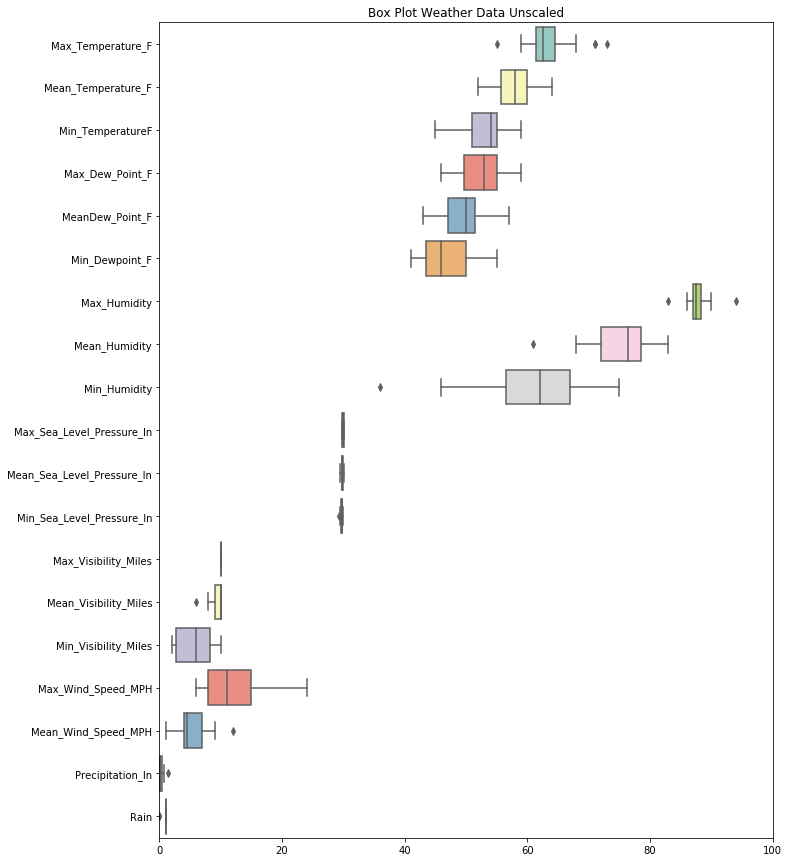

In [46]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Box Plot Weather Data Unscaled")
ax.set(xlim=(-.05, 100.05))
ax = sns.boxplot(data = weather[0:20], 
  orient = 'h', 
  palette = 'Set3')

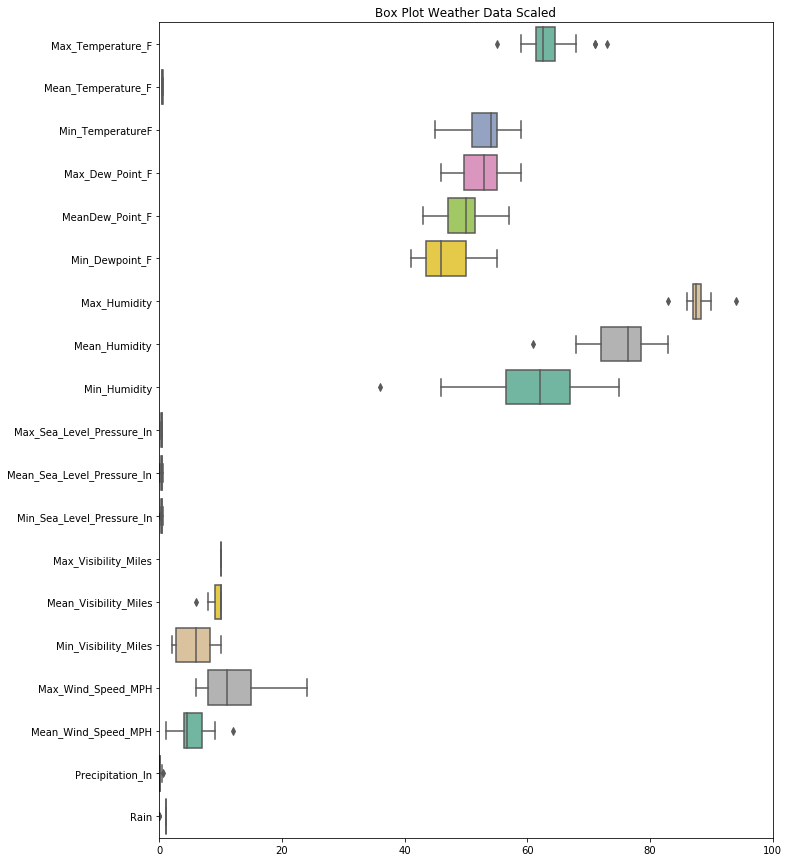

In [26]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Box Plot Weather Data Scaled")
ax.set(xlim=(-.05, 100.05))
ax = sns.boxplot(data = weather_scaled[0:20], 
  orient = 'h', 
  palette = 'Set2')

In [27]:
predictor_names=weather.columns.tolist()
#predictor_names=list(weather.columns)
predictor_names=predictor_names[0:18]
predictor_names

['Max_Temperature_F',
 'Mean_Temperature_F',
 'Min_TemperatureF',
 'Max_Dew_Point_F',
 'MeanDew_Point_F',
 'Min_Dewpoint_F',
 'Max_Humidity',
 'Mean_Humidity',
 'Min_Humidity',
 'Max_Sea_Level_Pressure_In',
 'Mean_Sea_Level_Pressure_In',
 'Min_Sea_Level_Pressure_In',
 'Max_Visibility_Miles',
 'Mean_Visibility_Miles',
 'Min_Visibility_Miles',
 'Max_Wind_Speed_MPH',
 'Mean_Wind_Speed_MPH',
 'Precipitation_In']

In [28]:
max_vals=weather.max()
print(max_vals)

Max_Temperature_F              98.00
Mean_Temperature_F             83.00
Min_TemperatureF               70.00
Max_Dew_Point_F                62.00
MeanDew_Point_F                59.00
Min_Dewpoint_F                 57.00
Max_Humidity                  100.00
Mean_Humidity                  90.00
Min_Humidity                   83.00
Max_Sea_Level_Pressure_In      30.86
Mean_Sea_Level_Pressure_In     30.81
Min_Sea_Level_Pressure_In      30.75
Max_Visibility_Miles           10.00
Mean_Visibility_Miles          10.00
Min_Visibility_Miles           10.00
Max_Wind_Speed_MPH             30.00
Mean_Wind_Speed_MPH            15.00
Precipitation_In                2.20
Rain                            1.00
dtype: float64


In [29]:
#median_vals=weather.groupby('Rain').median()
#print(median_vals)
#print("Max_Temperature_F:",median_vals['Max_Temperature_F'][True])
#print(np.abs((median_vals['Precipitation_In'][True]-median_vals['Precipitation_In'][False])/max_vals['Precipitation_In']))

In [30]:
def rank_predictors(dat,l,f='Rain'):
    rank={}
    max_vals=dat.max()
    median_vals=dat.groupby(f).median()
    print(l)
    for p in l:
        print(p)
        score=np.abs((median_vals[p][True]-median_vals[p][False])/max_vals[p])
        rank[p]=score
    return rank

In [31]:
#debug KeyError: 'M'
#debug KeyError: 'Max_Gust_Speed_MPH'

In [32]:
cat_rank=rank_predictors(weather,predictor_names) 
cat_rank

['Max_Temperature_F', 'Mean_Temperature_F', 'Min_TemperatureF', 'Max_Dew_Point_F', 'MeanDew_Point_F', 'Min_Dewpoint_F', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_Pressure_In', 'Mean_Sea_Level_Pressure_In', 'Min_Sea_Level_Pressure_In', 'Max_Visibility_Miles', 'Mean_Visibility_Miles', 'Min_Visibility_Miles', 'Max_Wind_Speed_MPH', 'Mean_Wind_Speed_MPH', 'Precipitation_In']
Max_Temperature_F
Mean_Temperature_F
Min_TemperatureF
Max_Dew_Point_F
MeanDew_Point_F
Min_Dewpoint_F
Max_Humidity
Mean_Humidity
Min_Humidity
Max_Sea_Level_Pressure_In
Mean_Sea_Level_Pressure_In
Min_Sea_Level_Pressure_In
Max_Visibility_Miles
Mean_Visibility_Miles
Min_Visibility_Miles
Max_Wind_Speed_MPH
Mean_Wind_Speed_MPH
Precipitation_In


{'Max_Dew_Point_F': 0.016129032258064516,
 'Max_Humidity': 0.10000000000000001,
 'Max_Sea_Level_Pressure_In': 0.0019442644199610733,
 'Max_Temperature_F': 0.12244897959183673,
 'Max_Visibility_Miles': 0.0,
 'Max_Wind_Speed_MPH': 0.13333333333333333,
 'MeanDew_Point_F': 0.0084745762711864406,
 'Mean_Humidity': 0.19444444444444445,
 'Mean_Sea_Level_Pressure_In': 0.0035702693930541847,
 'Mean_Temperature_F': 0.096385542168674704,
 'Mean_Visibility_Miles': 0.10000000000000001,
 'Mean_Wind_Speed_MPH': 0.20000000000000001,
 'Min_Dewpoint_F': 0.0,
 'Min_Humidity': 0.27710843373493976,
 'Min_Sea_Level_Pressure_In': 0.0045528455284551874,
 'Min_TemperatureF': 0.085714285714285715,
 'Min_Visibility_Miles': 0.5,
 'Precipitation_In': 0.063636363636363644}

In [33]:
cat_rank=sorted(cat_rank.items(), key=lambda x: x[1])
cat_rank

[('Min_Dewpoint_F', 0.0),
 ('Max_Visibility_Miles', 0.0),
 ('Max_Sea_Level_Pressure_In', 0.0019442644199610733),
 ('Mean_Sea_Level_Pressure_In', 0.0035702693930541847),
 ('Min_Sea_Level_Pressure_In', 0.0045528455284551874),
 ('MeanDew_Point_F', 0.0084745762711864406),
 ('Max_Dew_Point_F', 0.016129032258064516),
 ('Precipitation_In', 0.063636363636363644),
 ('Min_TemperatureF', 0.085714285714285715),
 ('Mean_Temperature_F', 0.096385542168674704),
 ('Max_Humidity', 0.10000000000000001),
 ('Mean_Visibility_Miles', 0.10000000000000001),
 ('Max_Temperature_F', 0.12244897959183673),
 ('Max_Wind_Speed_MPH', 0.13333333333333333),
 ('Mean_Humidity', 0.19444444444444445),
 ('Mean_Wind_Speed_MPH', 0.20000000000000001),
 ('Min_Humidity', 0.27710843373493976),
 ('Min_Visibility_Miles', 0.5)]

In [34]:
# Take the top predictors based on median difference
ranked_predictors=[]
for f in cat_rank[9:]:
    ranked_predictors.append(f[0])
ranked_predictors

['Mean_Temperature_F',
 'Max_Humidity',
 'Mean_Visibility_Miles',
 'Max_Temperature_F',
 'Max_Wind_Speed_MPH',
 'Mean_Humidity',
 'Mean_Wind_Speed_MPH',
 'Min_Humidity',
 'Min_Visibility_Miles']

In [35]:
#Here, use predictors rank > 0.09 as true predictors.

In [36]:
X = weather_scaled[predictor_names]
#setting target
y = weather_scaled["Rain"]

In [37]:
print (X.shape)
print (y.shape)
type(X)

(504, 18)
(504,)


pandas.core.frame.DataFrame

In [38]:
type(y)

pandas.core.series.Series

In [39]:
# setting Logistic regression classifier
# scikit-learn includes the intercept.

lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=0)

# Logistic regression metrics
LRm = lr.fit(X_train, y_train)

LRm.predict_proba(X_test)  # The returned estimates for all classes are ordered by the label of classes.


array([[  1.95399252e-14,   1.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00],
       [  9.86111043e-01,   1.38889565e-02],
       [  1.31004557e-01,   8.68995443e-01],
       [  0.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00],
       [  9.99522796e-01,   4.77203804e-04],
       [  0.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00],
       [  9.99596280e-01,   4.03719592e-04],
       [  9.99308386e-01,   6.91614401e-04],
       [  9.96144159e-01,   3.85584074e-03],
       [  9.59068662e-01,   4.09313378e-02],
       [  9.93424425e-01,   6.57557526e-03],
       [  9.92115152e-01,   7.88484821e-03],
       [  2.88657986e-15,   1.00000000e+00],
       [  4.36421164e-01,   5.63578836e-01],
       [  9.92415749e-01,   7.58425087e-03],
       [  9.91869602e-01,   8.13039798e-03],
       [  9.99689335e-01,   3.10664821e-04],
       [  0.00000000e+00,   1.00000000e+00],
       [  

In [40]:
LRm.coef_

array([[  2.91633866e-03,  -1.16143896e+01,  -2.50499761e-02,
          2.23981794e-01,  -9.17366284e-02,   1.77002421e-01,
         -9.69872552e-02,   1.25254917e-01,  -9.23560301e-02,
         -5.40893141e+00,   2.65100368e+00,   6.63746471e-01,
         -8.41787190e-01,   2.47783677e-01,  -1.78726964e-01,
          6.51918355e-02,   5.12736651e-02,   1.31473061e+03]])

In [41]:
LRm.intercept_ 

array([-0.08417872])

In [42]:
LRm.decision_function(X_test) # Predict confidence scores for samples.

array([  3.15719238e+01,   1.35094316e+02,  -4.26267494e+00,
         1.89210578e+00,   6.86150423e+01,   2.00736500e+02,
        -7.64708958e+00,   2.72158978e+02,   7.40879385e+01,
         1.31085311e+03,  -7.81438620e+00,  -7.27579013e+00,
        -5.55430291e+00,  -3.15406670e+00,  -5.01779592e+00,
        -4.83489621e+00,   3.34677421e+01,   2.55699480e-01,
        -4.87406828e+00,  -4.80398177e+00,  -8.07648526e+00,
         9.00510016e+02,   1.29585528e+02,  -5.58803939e+00,
         2.17904315e+01,   1.59598536e+02,   1.40690207e+02,
         4.44907330e+02,   4.51612574e+02,  -5.81308460e+00,
         3.18580274e+02,   8.64845261e+01,   2.44637499e+01,
        -4.78468242e+00,  -5.18470545e+00,   4.58384708e+02,
        -5.50994152e+00,   1.58363898e+02,  -4.68521725e+00,
        -6.25125135e+00,   4.69763106e-01,   8.29068858e+02,
        -4.26083501e+00,  -4.05294000e+00,   3.12245852e+01,
         6.33410646e+01,  -5.05352713e+00,  -4.80911400e+00,
         4.03053852e+02,

In [43]:
LRm.predict(X_test)

array([ True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
       False,  True, False, False,  True,  True, False, False,  True,
        True, False, False,  True,  True,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
        True, False, False,  True, False, False,  True,  True, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False,

In [44]:
y_pred = LRm.predict(X_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using Logistic regression is 1.0


In [45]:
k=9
acc=[]
for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=i)
    # Logistic regression metrics
    LRm = lr.fit(X_train, y_train)
    a=metrics.accuracy_score(y_test, LRm.predict(X_test))
    acc.append(a)
    
print (acc)
print (np.mean(acc))
print (np.std(acc))

[0.99009900990099009, 0.99009900990099009, 1.0, 1.0, 1.0, 0.99009900990099009, 0.99009900990099009, 1.0, 1.0]
0.995599559956
0.00491984153465
